In [96]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import numpy as np
import astropy.units as u
import datetime

from astropy.coordinates import SkyCoord, EarthLocation, AltAz, UnitSphericalRepresentation
from astropy.time import Time

In [100]:
# Modifying Erik's solution for simultaneously calculating altaz for multiple targets 

# Set up list of targets
vega = SkyCoord.from_name('Vega')
capella = SkyCoord.from_name('Capella')
sirius = SkyCoord.from_name('Sirius')
targets = [vega, capella, sirius]

location = EarthLocation('10d', '45d', 0)

times = Time('1995-01-01 00:00:00') + np.linspace(0, 1, 50)*u.day

Ntimes = np.tile(times, len(targets))
Ntargets = np.repeat(targets, len(times))
targsc = SkyCoord(SkyCoord(Ntargets).data.represent_as(UnitSphericalRepresentation),
                            representation=UnitSphericalRepresentation)

newsc = targsc.transform_to(AltAz(location=location, obstime=Ntimes))
#newsc.alt.reshape(3,2)  #this turns out *wrong*
#alts = newsc.alt.reshape(len(times), len(targets)).T # this is "right" -eteq

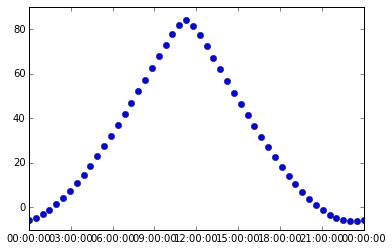

In [101]:
np.shape(newsc.alt)

# Brett's solution:
altitudes = np.split(newsc.alt, len(targets))
plt.plot_date(times.plot_date, altitudes[0])
plt.show()

In [103]:
#%matplotlib inline

# Double check by doing one star
vega_altaz = vega.transform_to(AltAz(location=location, obstime=times))
vega_alt = vega_altaz.alt

assert all(vega_alt == altitudes[0])